# (CT-236) Lab 2: Simulando Redes Livres de Escala
---

In [1]:
from igraph import *
from PIL import Image
from matplotlib import pyplot as plt
from math import log, floor, exp
import matplotlib.image as mpimg
import numpy as np
import networkx as nx
import random

In [2]:
def decision(probability):
    return random.random() < probability

def plot_graph(g, layout_name, filename):
    visual_style = {}
    visual_style["vertex_size"] = 2
    visual_style["edge_width"] = 1
    visual_style["bbox"] = (300, 300)
    visual_style["margin"] = 20
    visual_style["layout"] = g.layout(layout_name)
    plot(g, "plots/" + filename, **visual_style)
    return Image.open("plots/" + filename)

def generate_barabasi_albert(n, m):
    # Start with m vertices
    g = Graph()
    g.add_vertices(n)

    # Fully connected at start
    for i in range(m):
        for j in range(i + 1, m):
            g.add_edges([(i, j)])

    # Store nodes degrees
    degrees = []
    for i in range(m):
        degrees.append(m - 1)
    for i in range(m, n):
        degrees.append(0)
    #print(degrees)

    # Store sum of nodes degrees
    sum_degrees = m * (m - 1)
    #print(sum)

    # Grow the network
    while m < n:
        # First we decide to which nodes the new will be attached
        connections = []
        for i in range(m):
            connections.append(decision(degrees[i] / sum_degrees))

        # Now add the new connection and update the degrees
        for i in range(m):
            if connections[i]:
                g.add_edges([(m, i)])
                sum_degrees += 2
                degrees[i] += 1
                degrees[m] += 1
        m += 1
    ## Debug
    #print(degrees)
    #print(sum_degrees)
    return g

## Clustering Coefficient (CC)
### Parâmetros editáveis

In [3]:
# ==== Parâmetros ====
num_simulations = 5
m = 3

n_min = 1000
n_max = 10000
divs = 40

# ==== Auxiliary Processing ====
n_min = log(n_min)
n_max = log(n_max)
n_step = (n_max - n_min) / divs

n_per_simulation = []
aux = n_min
while aux <= n_max:
    n_per_simulation.append(floor(exp(aux)))
    aux = aux + n_step

### Calculando CC

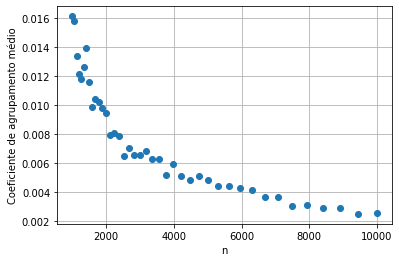

In [4]:
# ==== Processing ====
# CC
CCs = []
for n in n_per_simulation:
    sum_cc = 0
    for k in range(num_simulations):
        g = generate_barabasi_albert(n, m)
        sum_cc += g.transitivity_undirected()
    CCs.append(sum_cc / num_simulations)

# Log(n)
logn = []
for n in n_per_simulation:
    logn.append(log(n))
    
# Log(cc)
logcc = []
for cc in CCs:
    logcc.append(log(cc))
    
# ==== Plotting ====
plt.plot(n_per_simulation, CCs, 'o')

# Info
#plt.title("Coeficiente de agrupamento (CC) em função de n^(-3/4)")
plt.xlabel("n")
plt.ylabel("Coeficiente de agrupamento médio")

# Style
plt.rcParams["font.family"] = "serif"
plt.grid(True)

plt.savefig('plots/cc-n.png', dpi=400)
plt.show()

Inclinação:  -0.7628170375619753


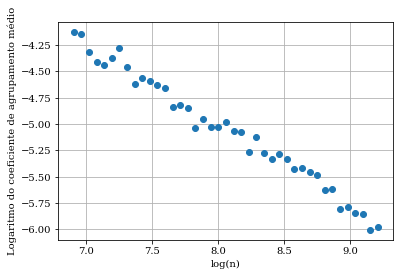

In [5]:
# ==== Plotting ====
plt.plot(logn, logcc, 'o')

slope, intercept = np.polyfit(np.array(logn), np.array(logcc), 1)
print('Inclinação: ', slope)

# Info
#plt.title("Coeficiente de agrupamento (CC) em função de n^(-3/4)")
plt.xlabel("log(n)")
plt.ylabel("Logaritmo do coeficiente de agrupamento médio")

# Style
plt.rcParams["font.family"] = "serif"
plt.grid(True)

plt.savefig('plots/logcc-logn.png', dpi=400)
plt.show()

---
## Comprimento médio de caminho
### Parâmetros editáveis

In [6]:
# ==== Parâmetros ====
num_simulations = 5
m = 3

n_min = 1000
n_max = 10000
divs = 40

# ==== Auxiliary Processing ====

# for APL x n
n_step = (n_max - n_min) / divs

n_per_simulation = []
aux = n_min
while aux <= n_max:
    n_per_simulation.append(aux)
    aux = floor(aux + n_step)

# for log(APL) x log(n)
n_min = log(n_min)
n_max = log(n_max)
n_step = (n_max - n_min) / divs

n_per_simulation_log = []
aux = n_min
while aux <= n_max:
    n_per_simulation_log.append(floor(exp(aux)))
    aux = aux + n_step

### Curva APL x n

Inclinação:  9.502711671295103e-05


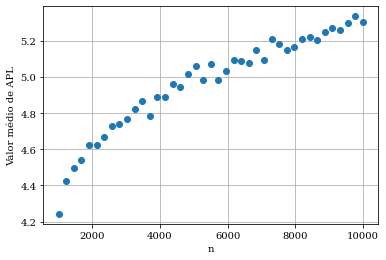

In [7]:
APLs = []
for n in n_per_simulation:
    sum_apl = 0
    for k in range(num_simulations):
        g = generate_barabasi_albert(n, m)
        sum_apl += g.average_path_length(directed=False)
    APLs.append(sum_apl / num_simulations)
    
# ==== Plotting ====
plt.plot(n_per_simulation, APLs, 'o')

slope, intercept = np.polyfit(np.array(n_per_simulation), np.array(APLs), 1)
print('Inclinação: ', slope)

# Info
#plt.title("Coeficiente de agrupamento (CC) em função de n^(-3/4)")
plt.xlabel("n")
plt.ylabel("Valor médio de APL")

# Style
plt.rcParams["font.family"] = "serif"
plt.grid(True)

plt.savefig('plots/apl-n.png', dpi=400)
plt.show()

### Curva log(APL) x log(n)

Inclinação:  0.09428873514601663


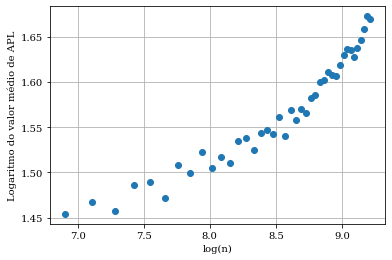

In [8]:
APLs = []
for n in n_per_simulation_log:
    sum_apl = 0
    for k in range(num_simulations):
        g = generate_barabasi_albert(n, m)
        sum_apl += g.average_path_length(directed=False)
    APLs.append(sum_apl / num_simulations)

# Log(n)
logn = []
for n in n_per_simulation:
    logn.append(log(n))
    
# Log(apl)
logapl = []
for apl in APLs:
    logapl.append(log(apl))
    
# ==== Plotting ====
plt.plot(logn, logapl, 'o')

slope, intercept = np.polyfit(np.array(logn), np.array(logapl), 1)
print('Inclinação: ', slope)

# Info
#plt.title("Coeficiente de agrupamento (CC) em função de n^(-3/4)")
plt.xlabel("log(n)")
plt.ylabel("Logaritmo do valor médio de APL")

# Style
plt.rcParams["font.family"] = "serif"
plt.grid(True)

plt.savefig('plots/logapl-logn.png', dpi=400)
plt.show()

### Curva APL x log(n)

Inclinação:  0.44735146064089104


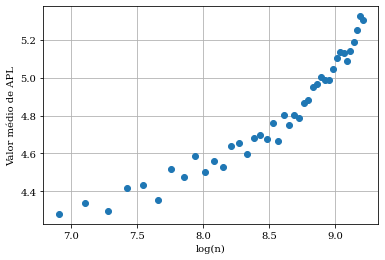

In [9]:
plt.plot(logn, APLs, 'o')

slope, intercept = np.polyfit(np.array(logn), np.array(APLs), 1)
print('Inclinação: ', slope)

# Info
#plt.title("Coeficiente de agrupamento (CC) em função de n^(-3/4)")
plt.xlabel("log(n)")
plt.ylabel("Valor médio de APL")

# Style
plt.rcParams["font.family"] = "serif"
plt.grid(True)

plt.savefig('plots/apl-logn.png', dpi=400)
plt.show()

---
## Comparação com redes Small World
### Parâmetros editáveis

In [10]:
# ==== Parâmetros ====
num_simulations = 1
m = 1
u = 0.21
r = 2

n_min = 1000
n_max = 10000
divs = 40

# ==== Auxiliary Processing ====

# for APL x n
n_step = (n_max - n_min) / divs

n_per_simulation = []
aux = n_min
while aux <= n_max:
    n_per_simulation.append(aux)
    aux = floor(aux + n_step)

### CC em redes SW por Watts-Strogatz 

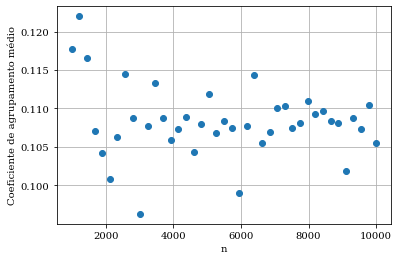

In [11]:
CCs = []
for n in n_per_simulation:
    sum_cc = 0
    for k in range(num_simulations):
        g = Graph.Watts_Strogatz(m, n, r, u)
        sum_cc += g.transitivity_undirected()
    CCs.append(sum_cc / num_simulations)
    
# ==== Plotting ====
plt.plot(n_per_simulation, CCs, 'o')

# Info
#plt.title("Coeficiente de agrupamento (CC) em função de n^(-3/4)")
plt.xlabel("n")
plt.ylabel("Coeficiente de agrupamento médio")

# Style
plt.rcParams["font.family"] = "serif"
plt.grid(True)

plt.savefig('plots/sw-cc.png', dpi=400)
plt.show()

### APL em redes SW por Watts-Strogatz 

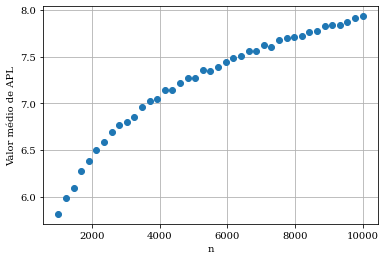

In [12]:
APLs = []
for n in n_per_simulation:
    sum_apl = 0
    for k in range(num_simulations):
        g = Graph.Watts_Strogatz(m, n, r, u)
        sum_apl += g.average_path_length(directed=False)
    APLs.append(sum_apl / num_simulations)
    
# ==== Plotting ====
plt.plot(n_per_simulation, APLs, 'o')

# Info
#plt.title("Coeficiente de agrupamento (CC) em função de n^(-3/4)")
plt.xlabel("n")
plt.ylabel("Valor médio de APL")

# Style
plt.rcParams["font.family"] = "serif"
plt.grid(True)

plt.savefig('plots/sw-apl.png', dpi=400)
plt.show()

---
## Refazendo as análises para o modelo Holme e Kim
### Parâmetros editáveis

In [13]:
# ==== Parâmetros ====
num_simulations = 5
m = 2
p = 0.21

n_min = 1000
n_max = 10000
divs = 40

# ==== Auxiliary Processing ====
n_step = (n_max - n_min) / divs
n_per_simulation = []
aux = n_min
while aux <= n_max:
    n_per_simulation.append(aux)
    aux = aux + n_step

n_min = log(n_min)
n_max = log(n_max)
n_step = (n_max - n_min) / divs

n_per_simulation_log = []
aux = n_min
while aux <= n_max:
    n_per_simulation_log.append(floor(exp(aux)))
    aux = aux + n_step

### Função para gerar a partir do networkX

In [14]:
# Let's cheat and use networkx for that
def generate_holmes_kim(n, m, p):
    nx_g = nx.powerlaw_cluster_graph(n, m, p)
    g = Graph.Adjacency((nx.to_numpy_matrix(nx_g) > 0).tolist())
    g = g.as_undirected()
    return g

### CC

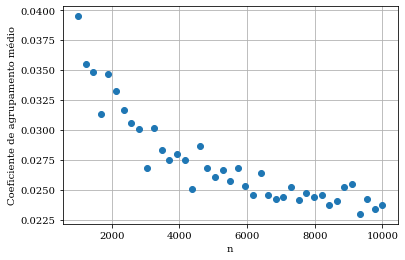

In [15]:
# ==== Processing ====
# CC
CCs = []
for n in n_per_simulation:
    sum_cc = 0
    for k in range(num_simulations):
        g = generate_holmes_kim(n, m, p)
        sum_cc += g.transitivity_undirected()
    CCs.append(sum_cc / num_simulations)

# Log(n)
logn = []
for n in n_per_simulation:
    logn.append(log(n))
    
# Log(cc)
logcc = []
for cc in CCs:
    logcc.append(log(cc))
    
# ==== Plotting ====
plt.plot(n_per_simulation, CCs, 'o')

# Info
#plt.title("Coeficiente de agrupamento (CC) em função de n^(-3/4)")
plt.xlabel("n")
plt.ylabel("Coeficiente de agrupamento médio")

# Style
plt.rcParams["font.family"] = "serif"
plt.grid(True)

plt.savefig('plots/hk-cc.png', dpi=400)
plt.show()

### APL

Inclinação:  9.162593243416881e-05


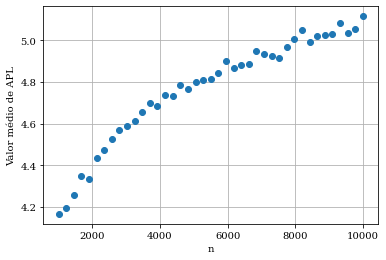

In [16]:
APLs = []
for n in n_per_simulation:
    sum_apl = 0
    for k in range(num_simulations):
        g = generate_holmes_kim(n, m, p)
        sum_apl += g.average_path_length(directed=False)
    APLs.append(sum_apl / num_simulations)
    
# ==== Plotting ====
plt.plot(n_per_simulation, APLs, 'o')

slope, intercept = np.polyfit(np.array(n_per_simulation), np.array(APLs), 1)
print('Inclinação: ', slope)

# Info
#plt.title("Coeficiente de agrupamento (CC) em função de n^(-3/4)")
plt.xlabel("n")
plt.ylabel("Valor médio de APL")

# Style
plt.rcParams["font.family"] = "serif"
plt.grid(True)

plt.savefig('plots/hk-apl-n.png', dpi=400)
plt.show()

Inclinação:  0.09955277190450029


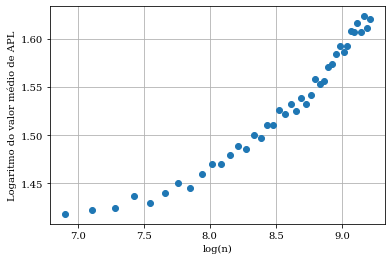

In [17]:
APLs = []
for n in n_per_simulation_log:
    sum_apl = 0
    for k in range(num_simulations):
        g = generate_holmes_kim(n, m, p)
        sum_apl += g.average_path_length(directed=False)
    APLs.append(sum_apl / num_simulations)

# Log(n)
logn = []
for n in n_per_simulation:
    logn.append(log(n))
    
# Log(apl)
logapl = []
for apl in APLs:
    logapl.append(log(apl))
    
# ==== Plotting ====
plt.plot(logn, logapl, 'o')

slope, intercept = np.polyfit(np.array(logn), np.array(logapl), 1)
print('Inclinação: ', slope)

# Info
#plt.title("Coeficiente de agrupamento (CC) em função de n^(-3/4)")
plt.xlabel("log(n)")
plt.ylabel("Logaritmo do valor médio de APL")

# Style
plt.rcParams["font.family"] = "serif"
plt.grid(True)

plt.savefig('plots/hk-logapl-logn.png', dpi=400)
plt.show()

Inclinação:  0.4536650277021089


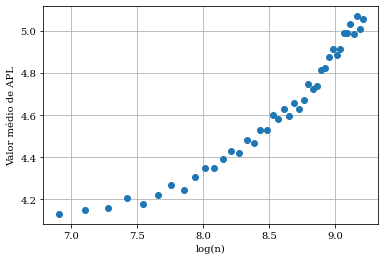

In [18]:
plt.plot(logn, APLs, 'o')

slope, intercept = np.polyfit(np.array(logn), np.array(APLs), 1)
print('Inclinação: ', slope)

# Info
#plt.title("Coeficiente de agrupamento (CC) em função de n^(-3/4)")
plt.xlabel("log(n)")
plt.ylabel("Valor médio de APL")

# Style
plt.rcParams["font.family"] = "serif"
plt.grid(True)

plt.savefig('plots/hk-apl-logn.png', dpi=400)
plt.show()